<a href="https://colab.research.google.com/github/kolhesamiksha/AI-learner/blob/main/Mnist_digit_recognition_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow.keras as keras
from keras.datasets import mnist
data = mnist.load_data()

In [18]:
((x_train,y_train),(x_test,y_test)) = mnist.load_data()

In [19]:
x_train.shape

(60000, 28, 28)

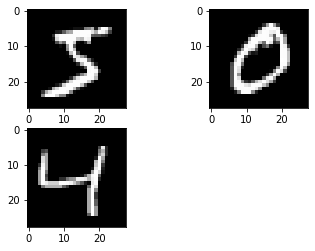

In [20]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(x_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap = plt.get_cmap('gray'))
plt.show()

In [21]:
# for converting the 2D data Into 1D
x_train = x_train.reshape((x_train.shape[0],28*28)).astype('float32')
x_test = x_test.reshape((x_test.shape[0],28*28)).astype('float32')

In [22]:
#Normalising values from 0-255 for converting the values into 0&1

x_train = x_train/255
x_test = x_test/255


In [23]:
y_train.shape

(60000,)

In [24]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print(y_test.shape)

(10000, 10)


In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(32, input_dim = 28*28, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [27]:
# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Train Model
model.fit(x_train, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 4s 2ms/step - loss: 0.8063 - accuracy: 0.7632
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2002 - accuracy: 0.9430
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1539 - accuracy: 0.9555
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1250 - accuracy: 0.9627
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9659
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0927 - accuracy: 0.9721
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9754
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9762
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9785
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9817

In [30]:
# Check Model Performance
scores = model.evaluate(x_test,y_test)
print(scores)

313/313 [==============================] - 1s 2ms/step - loss: 0.1101 - accuracy: 0.9670
[0.11007950454950333, 0.9670000076293945]


In [ ]:
# Make Predictions For Testing Data
predictions = model.predict(x_test)